### Usual import, allowing plot.ly runs offline

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
# Plotly's Python API contains a figure factory module which includes many wrapper functions 
# that create unique chart types that are not yet included in plotly.js. 
import plotly.figure_factory as ff
# REF: https://plot.ly/python/reference/
import plotly.graph_objs as go
# offline plotting
plotly.offline.init_notebook_mode()
import plotly.offline as py

# code-specific import
import os
import matplotlib.pyplot as plt

### Specify the folder and name of saved file

In [2]:
folder_path = r'D:\GDrive\Research\BIP\Humidity sensor project\profilometer spot\20180315 - Profilometry Si'
list_of_csv = os.listdir(folder_path)
output_file_name = 'combined_profilometry.csv'

### Join all the csv into one big dataframe

In [3]:
df_list = []
files_names = []
for file in list_of_csv:
    # all the files with .csv except for the combined one
    if '.csv' in file:
        if not output_file_name in file:
            files_names.append(file)
            # start from line 22 (profilometry data), only use 2 columns
            df_temp = pd.read_csv(r"{}\{}".format(folder_path, file), 
                                  skip_blank_lines=False, header=22, 
                                  usecols=['Lateral(mm)','Total Profile(nm)'])
            # change the y axis name to the sample name
            df_temp.rename(columns={'Lateral(mm)': 'X_'+file, "Total Profile(nm)": 'Y_'+file}, inplace=True)
            #print(df_temp)
            df_list.append(df_temp)

# combine all the df into a big one
combined_df = pd.concat(df_list, axis=1)
#print(combined_df)


### plot.ly method

In [4]:
# use the number to call different columns with iloc rather than name
#print(combined_df.iloc[:, [0,1]])
# plot it all out
data = []
for file in files_names:
    #print(list(combined_df)[2*i-1])
    trace = go.Scatter(
                        x = combined_df['X_{}'.format(file)],
                        y = combined_df['Y_{}'.format(file)],
                        name = file, 
                        )
    data.append(trace)
#print(trace)

### plot.ly method - plotting

In [5]:
from plotly import tools
#py.iplot(data, filename='profilometry')


fig = tools.make_subplots(rows=len(data), cols=1, subplot_titles=files_names)
fig['layout'].update(height=len(data)*500, width=1500, title='Stacked subplots')
#fig['layout'].update(autosize=True)

i = 1 
for trace in data:
    fig.append_trace(trace,i,1)
    i += 1

py.iplot(fig, filename='multiple-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]
[ (5,1) x5,y5 ]
[ (6,1) x6,y6 ]



### matplotlib method to plot all the columns

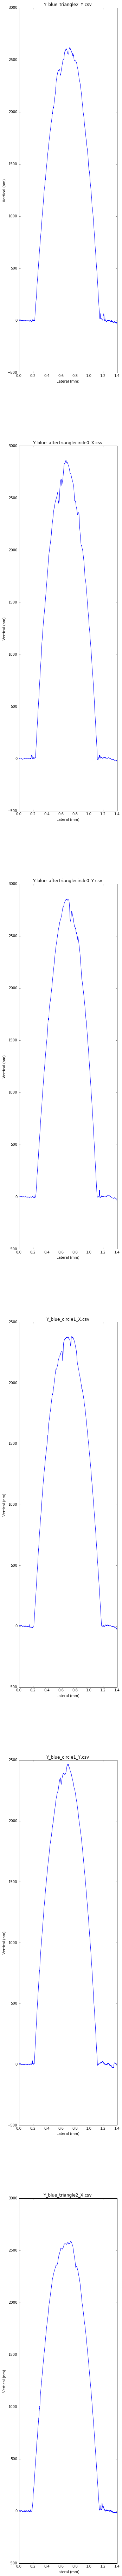

In [6]:
# use the number to call different columns with iloc rather than name
#print(combined_df.iloc[:, [0,1]])

number_of_csvs = int((len(list(combined_df))/2))
# create a large figure with multiple subplots (in vertical direction)
fig, axes = plt.subplots(number_of_csvs, 1, sharex=False, figsize=(5,130))

# plot it all out
for i in range(number_of_csvs):
    axes[i].set_title(list(combined_df)[2*i-1])
    axes[i].plot(combined_df.iloc[:, [2*i-2]], combined_df.iloc[:, [2*i-1]])
    axes[i].set_xlabel(r"Lateral (mm)")
    axes[i].set_ylabel(r"Vertical (nm)")
    
plt.show()